<a href="https://colab.research.google.com/github/filipe-rds/Projeto_Capacitacao_IoT_Ciclo_1/blob/main/Projeto_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📜 Projeto Final - Capacitação IoT (Ciclo 1)
# 🎓 Aluno: Filipe da Silva Rodrigues

##  🎲 Dados capturados do dispositivo conectado ao servidor

In [60]:
"""""
import argparse

# Construct the argument parser
ap = argparse.ArgumentParser()

# Add the arguments to the parser
ap.add_argument("-a", "--address", required=True,
   help="Server IP Address or URL")
ap.add_argument("-p", "--port", required=True,
   help="Server Port")
ap.add_argument("-d", "--deviceid", required=True,
   help="Device ID")

args = vars(ap.parse_args())


HOST = args['address']
PORT = int(args['port'])
device_id = args['deviceid']


Link do dispositivo IoT
https://wokwi.com/projects/381478883722503169


"""
import socket
import select

HOST = 'playback.laced.com.br'
PORT = 50000
device_id = '20222370009'

lista = []

# Create a socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the remote host and port
sock.connect((HOST, PORT))

print("conectado")

# Send a request to the host
sock.send("app\n".encode()[:-1])

# Get the host's response, no more than, say, 1,024 bytes
response_data = sock.recv(1024)

sresponse = response_data.decode("utf-8")
print(sresponse)

if sresponse == "fail":
    sock.close()
    exit()

# Send a request to the host
sock.send((device_id + "\n").encode()[:-1])

# Get the host's response, no more than, say, 1,024 bytes
response_data = sock.recv(1024)

sresponse = response_data.decode("utf-8")
print(sresponse)

# Set a timeout for socket operations (10 seconds in this case)
sock.settimeout(10)

while True:
    try:
        # Wait until there's data to read, or the timeout is reached
        ready, _, _ = select.select([sock], [], [], 10)

        if not ready:
            print("Tempo limite atingido. Encerrando conexão.")
            break

        # Get the host's response, no more than, say, 1,024 bytes
        response_data = sock.recv(1024).decode("utf-8")

        if response_data == "fail":
            print("O servidor retornou 'fail'. Encerrando conexão.")
            break

        print(f"Dado recebido: {response_data} ℃")
        lista.append(float(response_data))

    except socket.timeout:
        print("Tempo limite atingido. Encerrando conexão.")
        break

# Terminate
sock.close()


conectado
ok
ok
Dado recebido: 24 ℃
Dado recebido: 16 ℃
Dado recebido: 15 ℃
Dado recebido: 25 ℃
Dado recebido: 18 ℃
Dado recebido: 31 ℃
Dado recebido: 30 ℃
Dado recebido: 20 ℃
Dado recebido: 26 ℃
Dado recebido: 21 ℃
Dado recebido: 29 ℃
Dado recebido: 29 ℃
Dado recebido: 17 ℃
Dado recebido: 26 ℃
Dado recebido: 26 ℃
Dado recebido: 26 ℃
Dado recebido: 18 ℃
Dado recebido: 20 ℃
Dado recebido: 28 ℃
Dado recebido: 27 ℃
Dado recebido: 33 ℃
Dado recebido: 18 ℃
Dado recebido: 31 ℃
Dado recebido: 26 ℃
Dado recebido: 34 ℃
Dado recebido: 26 ℃
Dado recebido: 32 ℃
Dado recebido: 34 ℃
Dado recebido: 20 ℃
Dado recebido: 25 ℃
Dado recebido: 29 ℃
Dado recebido: 34 ℃
Dado recebido: 28 ℃
Dado recebido: 22 ℃
Dado recebido: 24 ℃
Dado recebido: 24 ℃
Dado recebido: 30 ℃
Dado recebido: 26 ℃
Dado recebido: 20 ℃
Dado recebido: 18 ℃
Dado recebido: 24 ℃
Dado recebido: 16 ℃
Dado recebido: 22 ℃
Dado recebido: 22 ℃
Dado recebido: 24 ℃
Dado recebido: 15 ℃
Dado recebido: 16 ℃
Dado recebido: 26 ℃
Dado recebido: 33 ℃
Dado

## 🤖 Gerando dataset dos registros

In [61]:
import pandas as pd
import numpy as np
i = 0

# Criando um dataset dos registros recebidos pelo dispositivo IoT
arquivo = open('registros.csv', 'w')
arquivo.write('Tempo;Temperatura;Estado\n')

for registro in lista:
    i+=1
    if registro > 0.0 and registro <= 20.0:
        arquivo.write(f'{i};{registro};Agradável\n')

    elif registro > 20.0 and registro <= 28.0:
        arquivo.write(f'{i};{registro};Aceitável\n')

    elif registro > 28.0 :
        arquivo.write(f'{i};{registro};Alarmante\n')

arquivo.close()

caminho = '/content/registros.csv'
df = pd.read_csv(caminho, sep=';')

print("Registros computados pelo sensor de temperatura:\n\n")
display(df)

lista = np.array(lista)
lista = np.mean(lista)
print(f'\nMédia da temperatura dos registros: {lista} ℃')

Registros computados pelo sensor de temperatura:




,Tempo,Temperatura,Estado
0,1,24.0,Aceitável
1,2,16.0,Agradável
2,3,15.0,Agradável
3,4,25.0,Aceitável
4,5,18.0,Agradável
...,...,...,...
94,95,33.0,Alarmante
95,96,19.0,Agradável
96,97,15.0,Agradável
97,98,18.0,Agradável



Média da temperatura dos registros: 23.80808080808081 ℃


## 📊 Análise dos registros através de gráficos

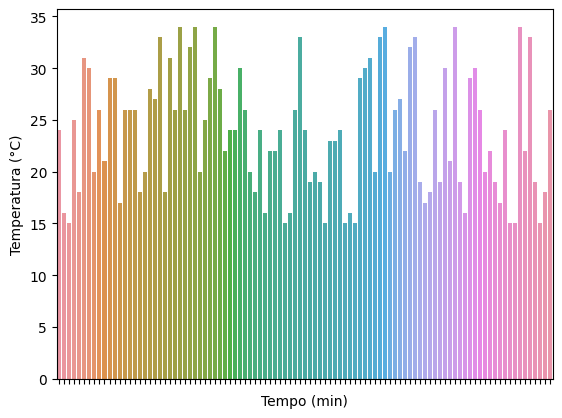

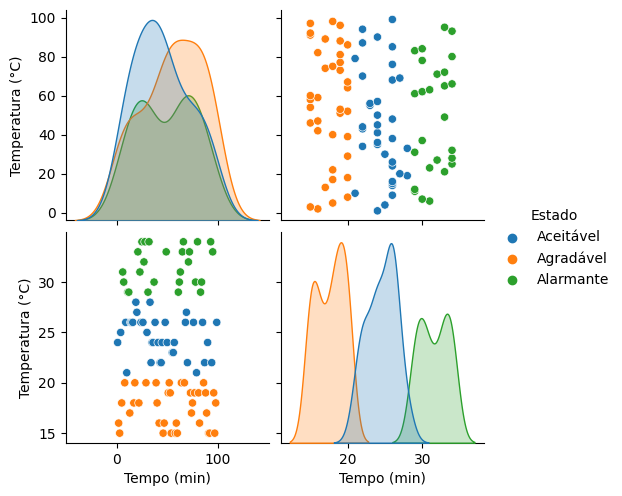

In [62]:
import seaborn as sns


# Gráfico de Barras
a = sns.barplot(x = "Tempo", y = "Temperatura", data = df)
a.set_xticklabels([])
a.set(xlabel = "Tempo (min)", ylabel = "Temperatura (°C)")

#Pair PLot
b = sns.pairplot(df, hue='Estado')
b.set(xlabel = "Tempo (min)", ylabel = "Temperatura (°C)")

